<a href="https://colab.research.google.com/github/onew11/study/blob/main/9_3_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 24s 68ms/step - loss: 0.6929 - accuracy: 0.5323 - val_loss: 0.6925 - val_accuracy: 0.5726
Epoch 2/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6919 - accuracy: 0.5972 - val_loss: 0.6912 - val_accuracy: 0.6094
Epoch 3/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6898 - accuracy: 0.6294 - val_loss: 0.6882 - val_accuracy: 0.6416
Epoch 4/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6836 - accuracy: 0.6403 - val_loss: 0.6748 - val_accuracy: 0.6042
Epoch 5/100
313/313 [==============================] - 12s 40ms/step - loss: 0.6516 - accuracy: 0.6451 - val_loss: 0.6272 - val_accuracy: 0.7228
Epoch 6/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6135 - accuracy: 0.7420 - val_loss: 0.6022 - val_accuracy: 0.7450
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5929 - accuracy: 0.7517 - val_loss: 0.5874 - val_ac

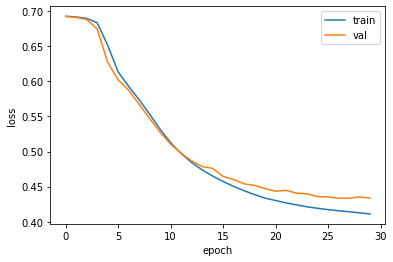

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6922 - accuracy: 0.5444 - val_loss: 0.6913 - val_accuracy: 0.5866
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.6895 - accuracy: 0.6078 - val_loss: 0.6876 - val_accuracy: 0.6286
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6773 - accuracy: 0.6223 - val_loss: 0.6594 - val_accuracy: 0.6374
Epoch 4/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6324 - accuracy: 0.7042 - val_loss: 0.6222 - val_accuracy: 0.7142
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6041 - accuracy: 0.7265 - val_loss: 0.5985 - val_accuracy: 0.7220
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5869 - accuracy: 0.7337 - val_loss: 0.5803 - val_accuracy: 0.7422
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5699 - accuracy: 0.7424 - val_loss: 0.5628 - val_ac

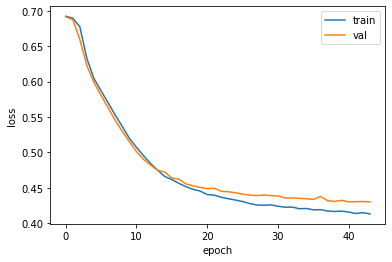

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 78ms/step - loss: 0.6925 - accuracy: 0.5348 - val_loss: 0.6913 - val_accuracy: 0.6122
Epoch 2/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6879 - accuracy: 0.6148 - val_loss: 0.6814 - val_accuracy: 0.6554
Epoch 3/100
313/313 [==============================] - 23s 75ms/step - loss: 0.6531 - accuracy: 0.6626 - val_loss: 0.6068 - val_accuracy: 0.7054
Epoch 4/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5796 - accuracy: 0.7179 - val_loss: 0.5532 - val_accuracy: 0.7314
Epoch 5/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5356 - accuracy: 0.7473 - val_loss: 0.5168 - val_accuracy: 0.7584
Epoch 6/100
313/313 [==============================] - 23s 74ms/step - loss: 0.5084 - accuracy: 0.7638 - val_loss: 0.4972 - val_accuracy: 0.7678
Epoch 7/100
313/313 [==============================] - 23s 75ms/step - loss: 0.4944 - accuracy: 0.7703 - val_loss: 0.4826 - val_ac

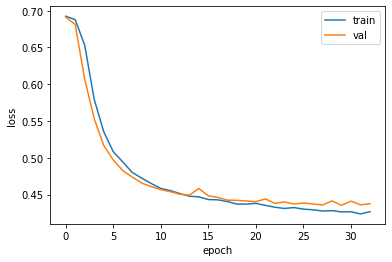

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 44ms/step - loss: 0.6918 - accuracy: 0.5375 - val_loss: 0.6907 - val_accuracy: 0.5656
Epoch 2/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6886 - accuracy: 0.5808 - val_loss: 0.6873 - val_accuracy: 0.5856
Epoch 3/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6837 - accuracy: 0.6059 - val_loss: 0.6817 - val_accuracy: 0.6072
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6757 - accuracy: 0.6232 - val_loss: 0.6725 - val_accuracy: 0.6268
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6624 - accuracy: 0.6420 - val_loss: 0.6571 - val_accuracy: 0.6442
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6395 - accuracy: 0.6623 - val_loss: 0.6286 - val_accuracy: 0.6694
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5935 - accuracy: 0.6938 - val_loss: 0.5715 - val_ac

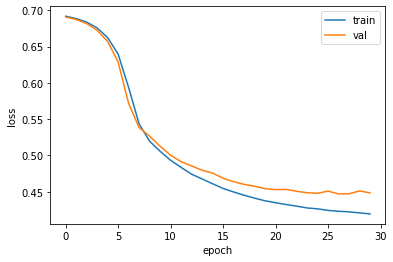

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 11s 13ms/step - loss: 0.4310 - accuracy: 0.7975


[0.43103742599487305, 0.7975199818611145]